In [312]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import f1_score


data = pd.read_sql_query("SELECT * FROM 'mortgage complaints'", "sqlite:///StaterData.db")

# Drop dates for testing purposes
# data.drop(['Date received', 'Date sent to company'], axis=1)

#Limit test size due to performance issues
data = data.loc[:5000]

In [313]:
data.describe()

,index,Consumer consent provided?,Timely response?,Consumer disputed?,Complaint ID
count,5001.000000,5001.0,5001.000000,5001.000000,5.001000e+03
mean,6137.701060,1.0,0.790442,0.982004,3.497328e+06
std,3742.940518,0.0,0.407034,0.132951,1.438660e+06
min,0.000000,1.0,0.000000,0.000000,1.290564e+06
25%,2942.000000,1.0,1.000000,1.000000,2.276612e+06
50%,5872.000000,1.0,1.000000,1.000000,3.359650e+06
75%,9241.000000,1.0,1.000000,1.000000,4.502969e+06
max,13115.000000,1.0,1.000000,1.000000,6.844111e+06


In [314]:
# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in your dataset that contains the text data
y = data['Issue']  # target_column is the name of the column in your dataset that contains the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize your text data using a bag-of-words approach
vectorizer = CountVectorizer(stop_words=None)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1score = f1_score(y_test, y_pred, average='macro')
print('F1 score:', f1score)


Accuracy: 0.4770153231179214
F1 score: 0.11557472975834712


['Applying for a mortgage or refinancing an existing mortgage'
 'Trouble during payment process' 'Struggling to pay mortgage'
 "Problem with a credit reporting company's investigation into an existing problem"
 'Loan servicing, payments, escrow account'
 'Loan modification,collection,foreclosure'
 'Incorrect information on your report'
 'Application, originator, mortgage broker' 'Closing on a mortgage'
 'Settlement process and costs' 'Credit decision / Underwriting'
 'Problem with fraud alerts or security freezes'
 'Improper use of your report'
 'Unable to get your credit report or credit score'
 'Credit monitoring or identity theft protection services']


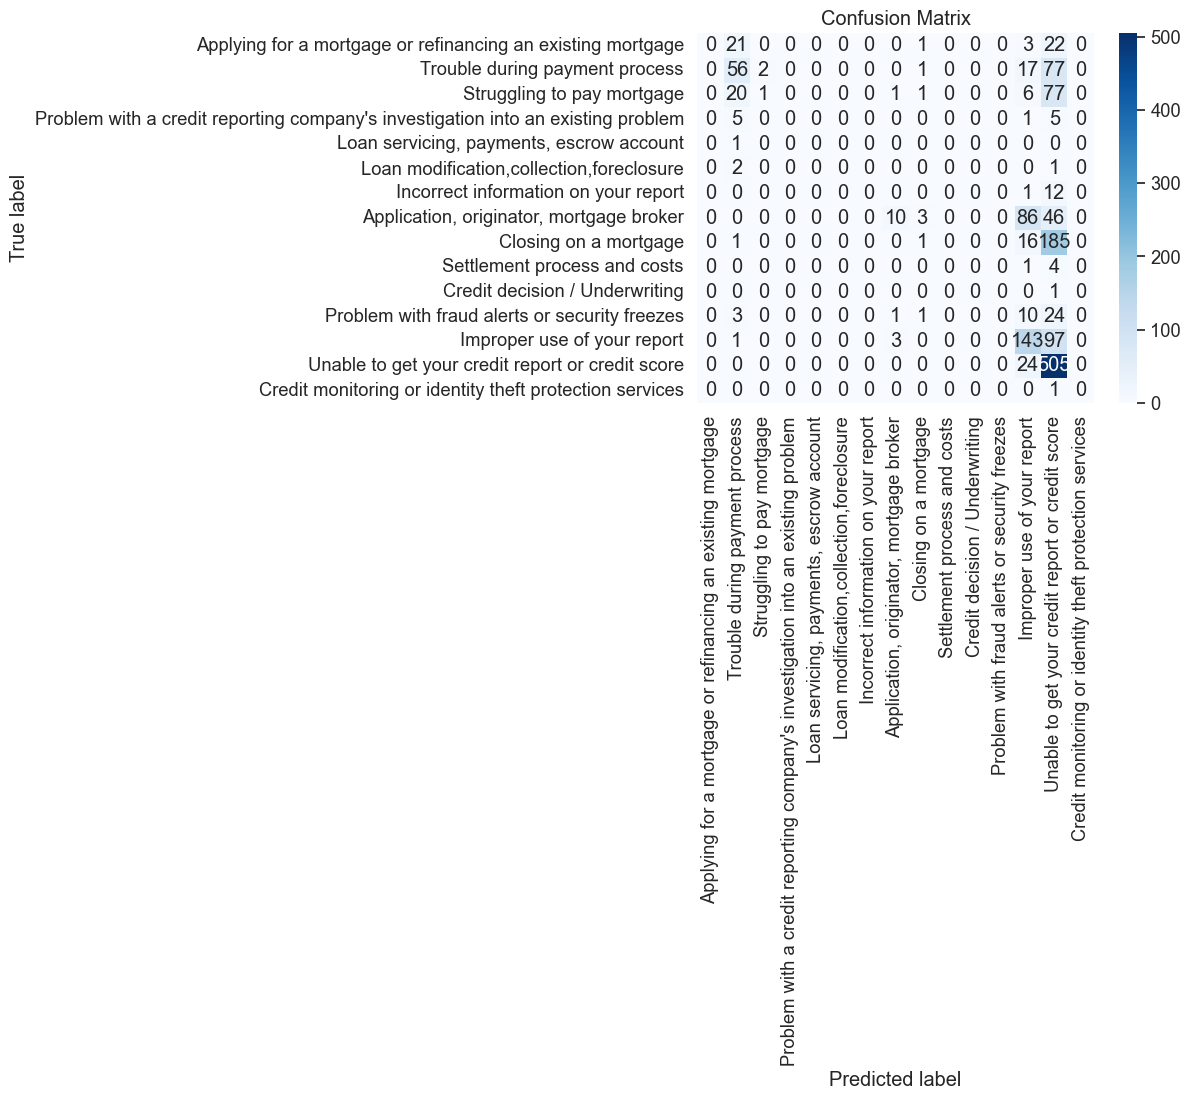

In [315]:
# make predictions on test data using trained model
y_pred = rf_model.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create labels for xticklabels
labels = data['Issue'].unique()
print(labels)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [292]:
# Create a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
df = pd.DataFrame(report).transpose()

# Print the DataFrame
print(df)



                                                    precision    recall  \
Application, originator, mortgage broker             0.000000  0.000000   
Applying for a mortgage or refinancing an exist...   0.536765  0.477124   
Closing on a mortgage                                0.600000  0.117073   
Credit decision / Underwriting                       0.000000  0.000000   
Credit monitoring or identity theft protection ...   0.000000  0.000000   
Improper use of your report                          0.000000  0.000000   
Incorrect information on your report                 1.000000  0.021739   
Loan modification,collection,foreclosure             0.558824  0.066667   
Loan servicing, payments, escrow account             0.529412  0.048257   
Problem with a credit reporting company's inves...   1.000000  0.047619   
Settlement process and costs                         0.000000  0.000000   
Struggling to pay mortgage                           0.492997  0.664151   
Trouble during payment pr

C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


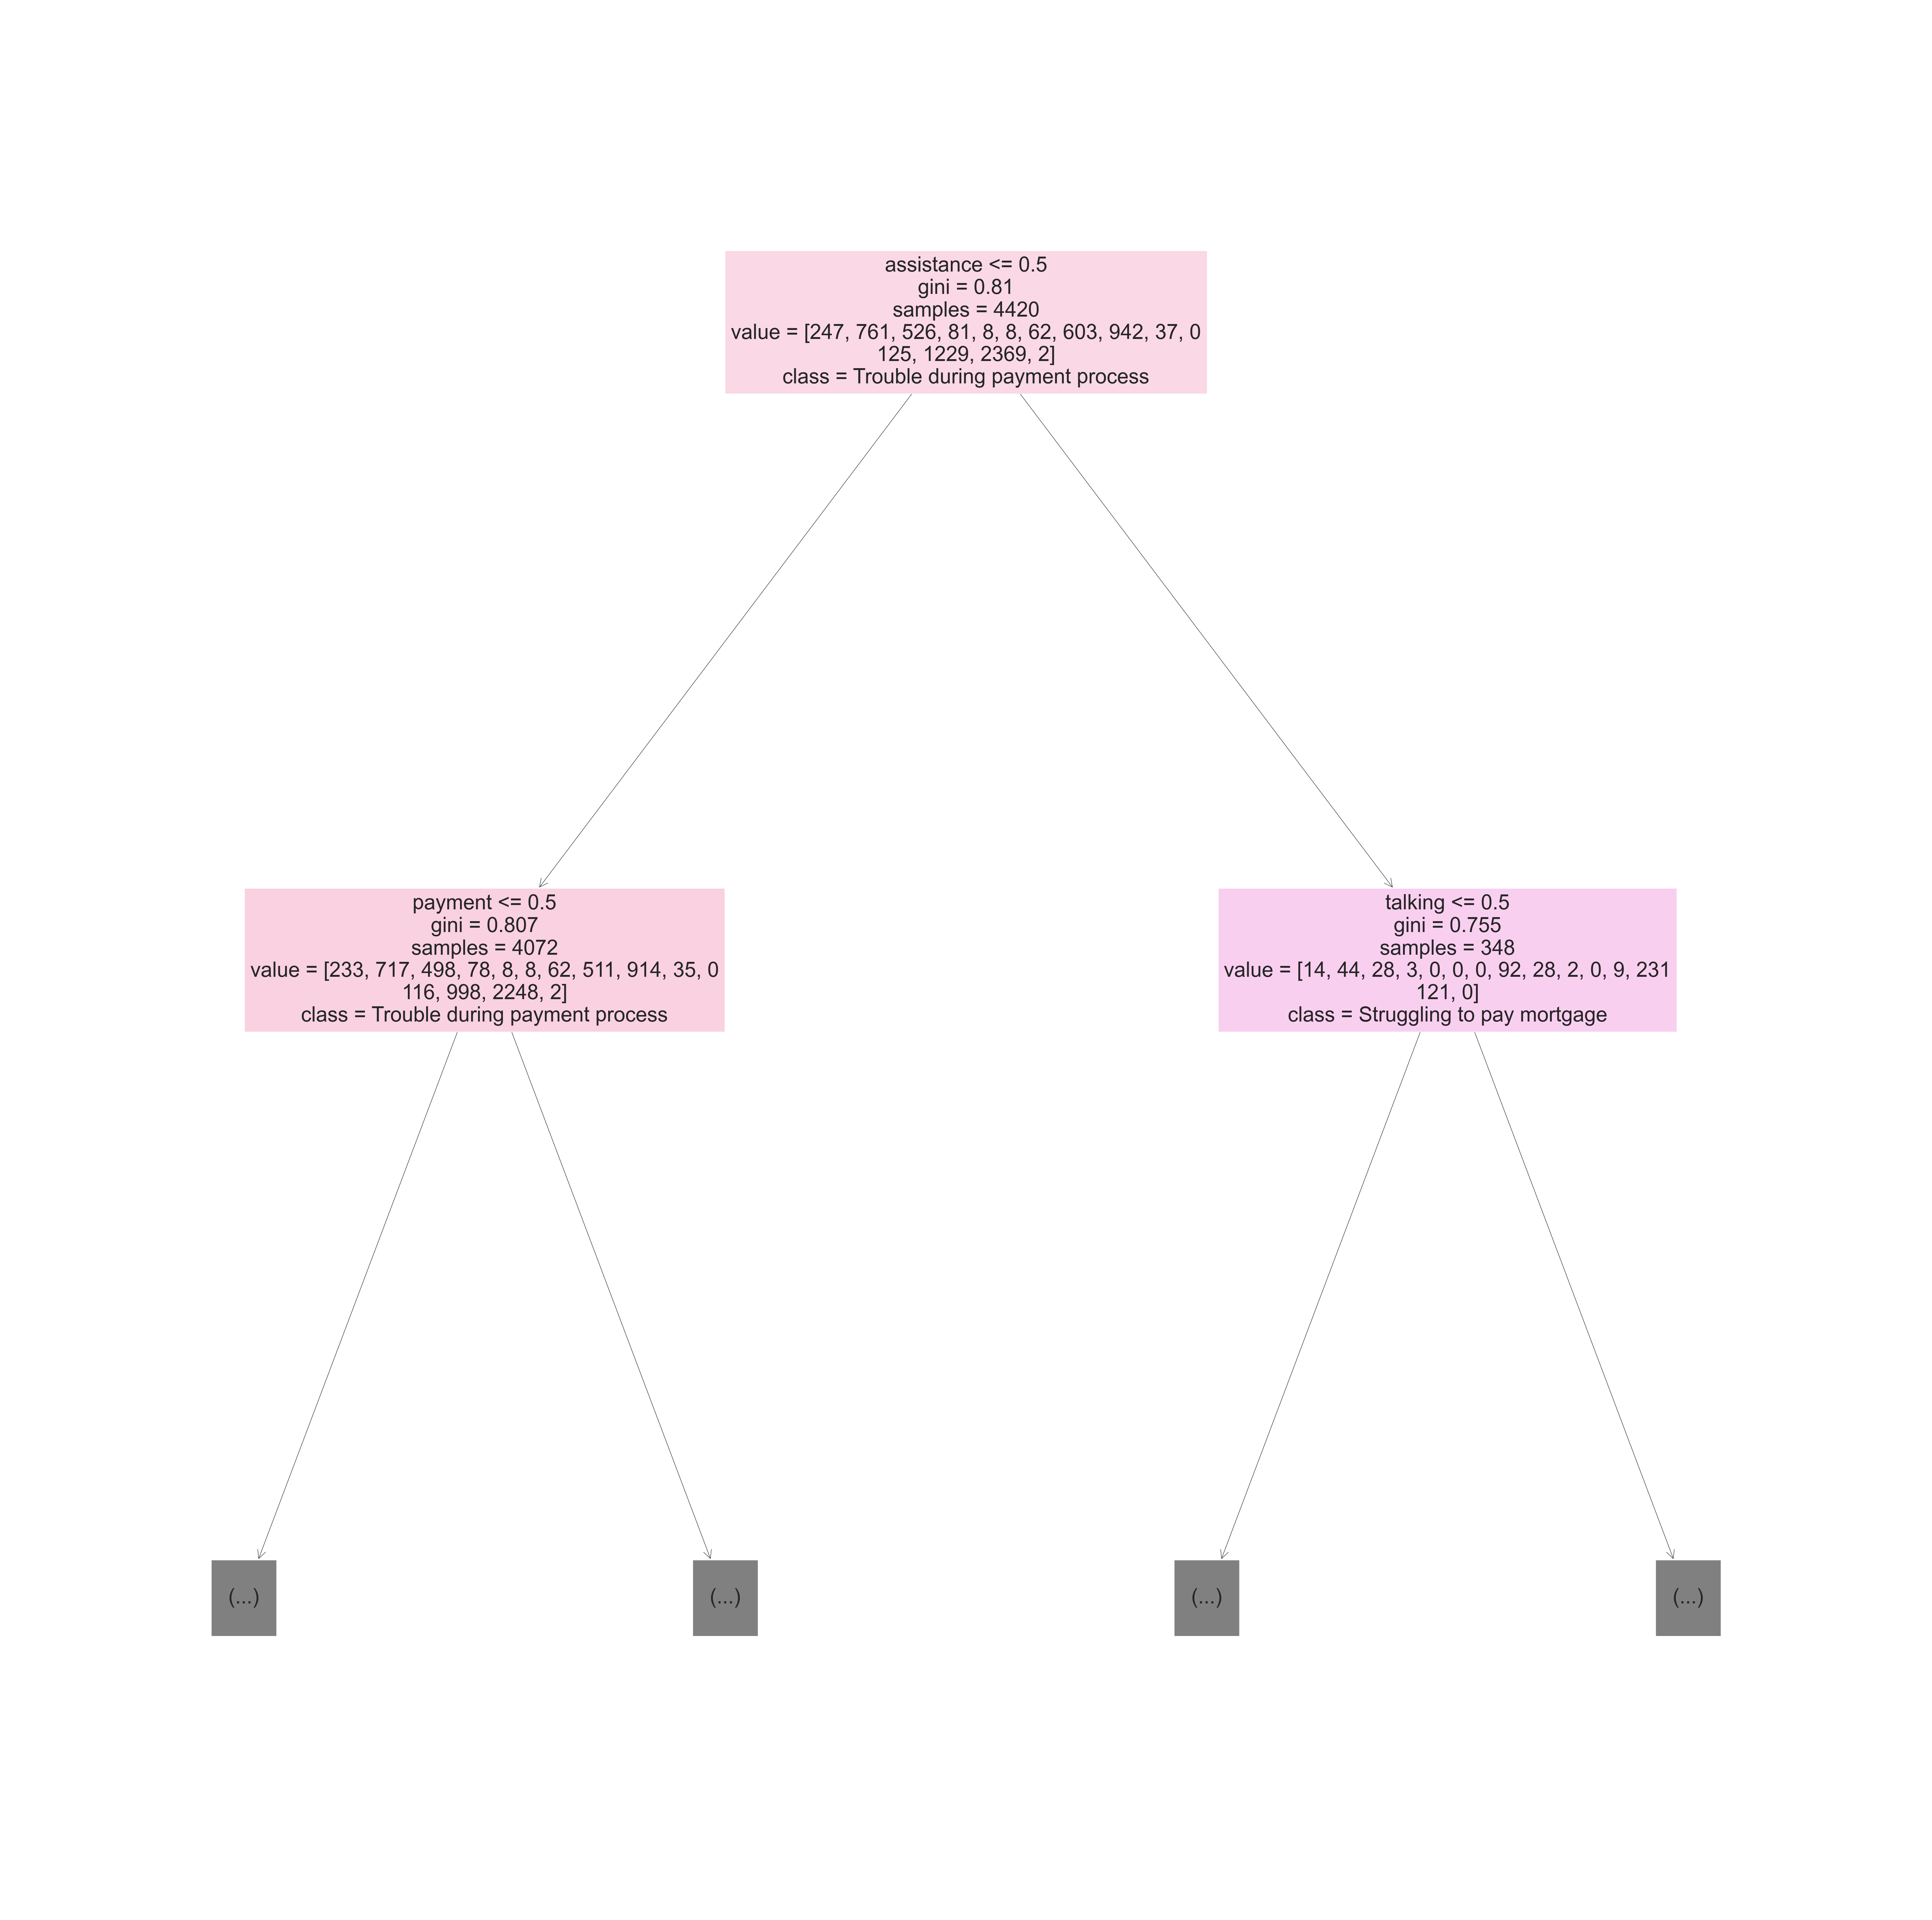

In [294]:
# Visualize the first tree in the Random Forest
plt.figure(figsize=(80, 80))

plot_tree(rf_model.estimators_[0], feature_names=vectorizer.get_feature_names_out(), class_names=rf_model.classes_, filled=True, max_depth=1)
plt.show()


In [295]:
formatted_accuracy = str(int(accuracy*100))
joblib.dump(rf_model, 'rf_model ' + formatted_accuracy + '%.joblib')
print(formatted_accuracy)

50


In [254]:
#Load the saved model from the file
loaded_model = joblib.load('rf_model.joblib')


In [272]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in your dataset that contains the text data
y = data['Issue']  # target_column is the name of the column in your dataset that contains the target variable

# Vectorize your text data using a bag-of-words approach
vectorizer = CountVectorizer(stop_words=None)
X = vectorizer.fit_transform(X)

# Define the range of random state values to test
random_states = np.arange(1, 100)

# Initialize variables to store the best random state and its corresponding accuracy
best_random_state = 0
best_accuracy = 0

# Loop over different random state values and calculate the accuracy for each run
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

# Print the best random state and its corresponding accuracy
print('Best random state:', best_random_state)
print('Best accuracy:', best_accuracy)
